## Import of libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from functions.len_and_unique_info import len_and_unique_info
from functions.column_metrics import column_metrics
from functions.plot_scp import (
    plot_histograms, 
    plot_bars, 
    plot_graph, 
    plot_corr_matrix, 
    plot_3d_atoms, 
    plot_oof_preds
)
from functions.train_test_split import train_test_split
from functions.confidence_interval import confidence_interval
from functions.train_test_split import train_test_split
from functions.feature_engineering import (
    add_number_of_edges, 
    map_atom_info, 
    add_distances, 
    add_type_info, 
    add_mean_dist, 
    encode_implement_all
)
from functions.model_training import train_model_regression, scored_df

%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

## DataFrames preparation

In [2]:
structures = pd.read_csv('data/structures.csv')
structures.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [3]:
data = pd.read_csv('data/train.csv')
data.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [4]:
train, test = train_test_split(data, 'molecule_name')
type_list = train['type']

train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,10,dsgdb9nsd_000002,1,0,1JHN,32.6889
1,11,dsgdb9nsd_000002,1,2,2JHH,-11.1866
2,12,dsgdb9nsd_000002,1,3,2JHH,-11.1757
3,13,dsgdb9nsd_000002,2,0,1JHN,32.6891
4,14,dsgdb9nsd_000002,2,3,2JHH,-11.1758


## Feature engineering

### Add number of edges coming out of nodes depending on the type.

In [5]:
train = add_number_of_edges(train)
test = add_number_of_edges(test)

train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,connections_0,connections_1
0,10,dsgdb9nsd_000002,1,0,1JHN,32.6889,7.0,6.0
1,11,dsgdb9nsd_000002,1,2,2JHH,-11.1866,0.0,0.0
2,12,dsgdb9nsd_000002,1,3,2JHH,-11.1757,0.0,0.0
3,13,dsgdb9nsd_000002,2,0,1JHN,32.6891,8.0,6.0
4,14,dsgdb9nsd_000002,2,3,2JHH,-11.1758,0.0,0.0


### Add coordinates

In [6]:
train = map_atom_info(train, structures, [0, 1])
test = map_atom_info(test, structures, [0, 1])

train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,connections_0,connections_1,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1
0,10,dsgdb9nsd_000002,1,0,1JHN,32.6889,7.0,6.0,H,0.017257,0.012545,-0.027377,N,-0.040426,1.024108,0.062564
1,11,dsgdb9nsd_000002,1,2,2JHH,-11.1866,0.0,0.0,H,0.017257,0.012545,-0.027377,H,0.915789,1.358745,-0.028758
2,12,dsgdb9nsd_000002,1,3,2JHH,-11.1757,0.0,0.0,H,0.017257,0.012545,-0.027377,H,-0.520278,1.343532,-0.775543
3,13,dsgdb9nsd_000002,2,0,1JHN,32.6891,8.0,6.0,H,0.915789,1.358745,-0.028758,N,-0.040426,1.024108,0.062564
4,14,dsgdb9nsd_000002,2,3,2JHH,-11.1758,0.0,0.0,H,0.915789,1.358745,-0.028758,H,-0.520278,1.343532,-0.775543


### Add distances

In [7]:
train = add_distances(train, ['x_0', 'y_0', 'z_0'], ['x_1', 'y_1', 'z_1'])
test = add_distances(test, ['x_0', 'y_0', 'z_0'], ['x_1', 'y_1', 'z_1'])

train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,connections_0,connections_1,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,dist,dist_x,dist_y,dist_z
0,10,dsgdb9nsd_000002,1,0,1JHN,32.6889,7.0,6.0,H,0.017257,0.012545,-0.027377,N,-0.040426,1.024108,0.062564,1.017190,0.003327,1.023259,0.008089
1,11,dsgdb9nsd_000002,1,2,2JHH,-11.1866,0.0,0.0,H,0.017257,0.012545,-0.027377,H,0.915789,1.358745,-0.028758,1.618523,0.807360,1.812254,0.000002
2,12,dsgdb9nsd_000002,1,3,2JHH,-11.1757,0.0,0.0,H,0.017257,0.012545,-0.027377,H,-0.520278,1.343532,-0.775543,1.618710,0.288944,1.771526,0.559752
3,13,dsgdb9nsd_000002,2,0,1JHN,32.6891,8.0,6.0,H,0.915789,1.358745,-0.028758,N,-0.040426,1.024108,0.062564,1.017187,0.914348,0.111982,0.008340
4,14,dsgdb9nsd_000002,2,3,2JHH,-11.1758,0.0,0.0,H,0.915789,1.358745,-0.028758,H,-0.520278,1.343532,-0.775543,1.618706,2.062289,0.000231,0.557688


### Add splited type info

In [8]:
train = add_type_info(train, 'type')
test = add_type_info(test, 'type')

train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,connections_0,connections_1,atom_0,x_0,...,atom_1,x_1,y_1,z_1,dist,dist_x,dist_y,dist_z,type_0,type_1
0,10,dsgdb9nsd_000002,1,0,1JHN,32.6889,7.0,6.0,H,0.017257,...,N,-0.040426,1.024108,0.062564,1.017190,0.003327,1.023259,0.008089,1,JHN
1,11,dsgdb9nsd_000002,1,2,2JHH,-11.1866,0.0,0.0,H,0.017257,...,H,0.915789,1.358745,-0.028758,1.618523,0.807360,1.812254,0.000002,2,JHH
2,12,dsgdb9nsd_000002,1,3,2JHH,-11.1757,0.0,0.0,H,0.017257,...,H,-0.520278,1.343532,-0.775543,1.618710,0.288944,1.771526,0.559752,2,JHH
3,13,dsgdb9nsd_000002,2,0,1JHN,32.6891,8.0,6.0,H,0.915789,...,N,-0.040426,1.024108,0.062564,1.017187,0.914348,0.111982,0.008340,1,JHN
4,14,dsgdb9nsd_000002,2,3,2JHH,-11.1758,0.0,0.0,H,0.915789,...,H,-0.520278,1.343532,-0.775543,1.618706,2.062289,0.000231,0.557688,2,JHH


### Add mean dist by group

In [9]:
train = add_mean_dist(train, ['type', 'type_0', 'type_1', ['molecule_name', 'type']])
test = add_mean_dist(test, ['type', 'type_0', 'type_1', ['molecule_name', 'type']])

train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,connections_0,connections_1,atom_0,x_0,...,dist,dist_x,dist_y,dist_z,type_0,type_1,dist_to_type_mean,dist_to_type_0_mean,dist_to_type_1_mean,dist_to_molecule_name_type_mean
0,10,dsgdb9nsd_000002,1,0,1JHN,32.6889,7.0,6.0,H,0.017257,...,1.017190,0.003327,1.023259,0.008089,1,JHN,1.004308,0.934666,0.414924,0.999995
1,11,dsgdb9nsd_000002,1,2,2JHH,-11.1866,0.0,0.0,H,0.017257,...,1.618523,0.807360,1.812254,0.000002,2,JHH,0.911875,0.774202,0.691769,0.999924
2,12,dsgdb9nsd_000002,1,3,2JHH,-11.1757,0.0,0.0,H,0.017257,...,1.618710,0.288944,1.771526,0.559752,2,JHH,0.911981,0.774292,0.691849,1.000039
3,13,dsgdb9nsd_000002,2,0,1JHN,32.6891,8.0,6.0,H,0.915789,...,1.017187,0.914348,0.111982,0.008340,1,JHN,1.004305,0.934664,0.414923,0.999992
4,14,dsgdb9nsd_000002,2,3,2JHH,-11.1758,0.0,0.0,H,0.915789,...,1.618706,2.062289,0.000231,0.557688,2,JHH,0.911978,0.774290,0.691847,1.000037


### Encode categorical data

In [10]:
train = encode_implement_all(train, ['atom_1', 'atom_0', 'type_1', 'type_0'])
test = encode_implement_all(test, ['atom_1', 'atom_0', 'type_1', 'type_0'])

train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,connections_0,connections_1,x_0,y_0,...,dist_to_molecule_name_type_mean,C,N,H,JHH,JHN,JHC,1,3,2
0,10,dsgdb9nsd_000002,1,0,1JHN,32.6889,7.0,6.0,0.017257,0.012545,...,0.999995,0,1,1,0,1,0,1,0,0
1,11,dsgdb9nsd_000002,1,2,2JHH,-11.1866,0.0,0.0,0.017257,0.012545,...,0.999924,0,0,1,1,0,0,0,0,1
2,12,dsgdb9nsd_000002,1,3,2JHH,-11.1757,0.0,0.0,0.017257,0.012545,...,1.000039,0,0,1,1,0,0,0,0,1
3,13,dsgdb9nsd_000002,2,0,1JHN,32.6891,8.0,6.0,0.915789,1.358745,...,0.999992,0,1,1,0,1,0,1,0,0
4,14,dsgdb9nsd_000002,2,3,2JHH,-11.1758,0.0,0.0,0.915789,1.358745,...,1.000037,0,0,1,1,0,0,0,0,1


### Discard irrelevant columns

In [11]:
train = train.drop(['molecule_name', 'id'], axis=1)
test = test.drop(['molecule_name', 'id'], axis=1)

## Plots

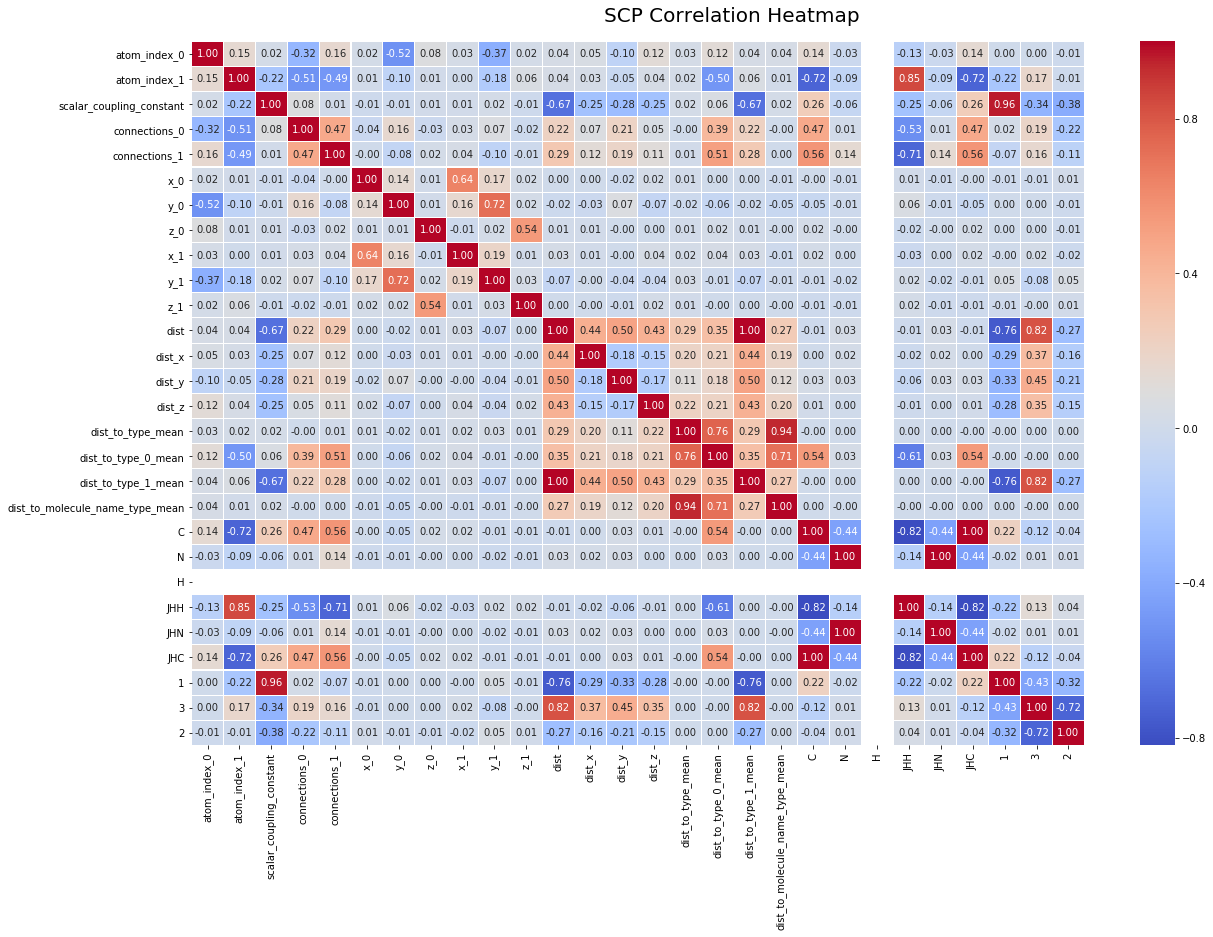

In [12]:
plot_corr_matrix(train, 'SCP Correlation Heatmap')

Plot relationships between continuous elements that are most correlated with scp.

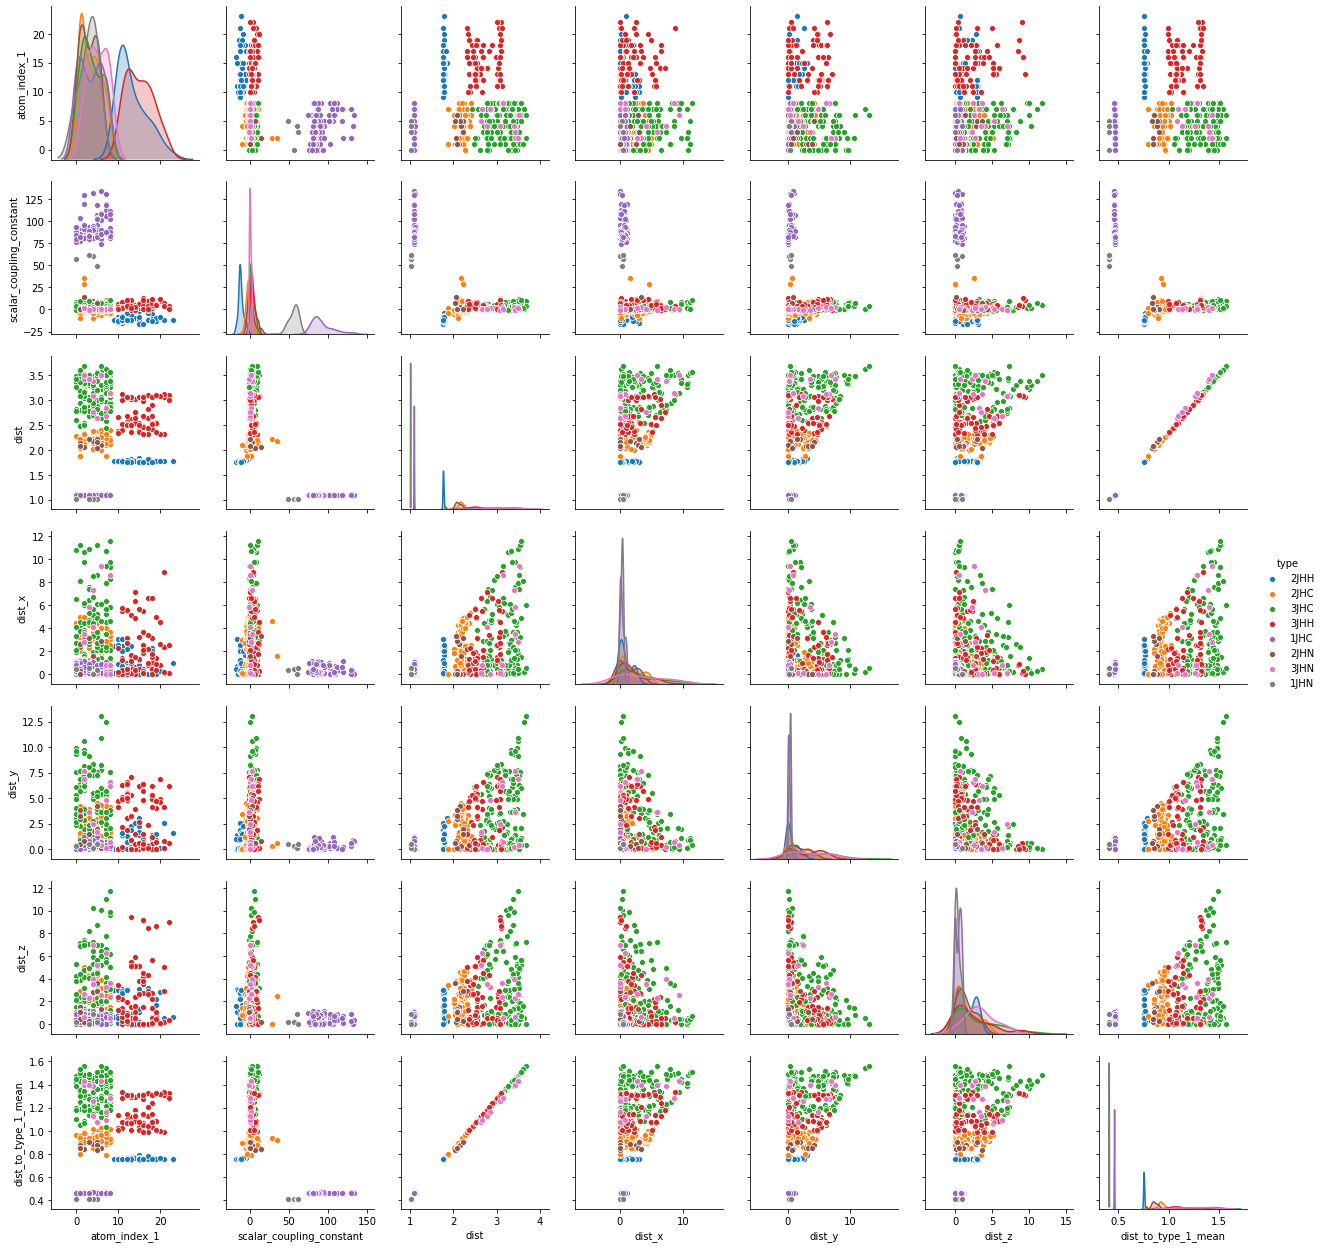

In [13]:
indices = train.corr().index[abs(train.corr().iloc[:,:20])['scalar_coupling_constant']>0.21][:7]
cols_with_strong_corr = train[indices]
cols_with_strong_corr.loc[:, 'type'] = train['type']
sns.pairplot(data=cols_with_strong_corr.sample(500), hue='type')

## Separate labels

In [14]:
y_train = train['scalar_coupling_constant']
X_train = train.drop('scalar_coupling_constant', axis=1)
X_train = encode_implement_all(X_train, ['type']) #encoding type

y_test = test['scalar_coupling_constant']
X_test = test.drop('scalar_coupling_constant', axis=1)
X_test = encode_implement_all(X_test, ['type']) #encoding type

## Models training

In [15]:
models_dir = os.getcwd() + '/models'

In [16]:
params = {'num_leaves': 128,
              'min_child_samples': 79,
              'objective': 'regression',
              'max_depth': 13,
              'learning_rate': 0.2,
              "boosting_type": "gbdt",
              "subsample_freq": 1,
              "subsample": 0.9,
              "bagging_seed": 11,
              "metric": 'mae',
              "verbosity": -1,
              'reg_alpha': 0.1,
              'reg_lambda': 0.3,
              'colsample_bytree': 1.0
             }

model, result_dict_lgb = train_model_regression(X=X_train, 
                                         X_test=X_test, 
                                         y=y_train, 
                                         params=params, 
                                         model_name='model_lgb',
                                         models_dir=models_dir,
                                         model_type='lgb', 
                                         eval_metric='mae', 
                                         plot_feature_importance=True,
                                         verbose=1000, 
                                         early_stopping_rounds=200, 
                                         n_estimators=10000
                                        )

## Models Evauation

In [17]:
scored_df(result_dict_lgb['scores'])

,Fold_1,Fold_2,Fold_3,Fold_4,Fold_5
0,1.699751,1.707439,1.704547,1.705114,1.701204


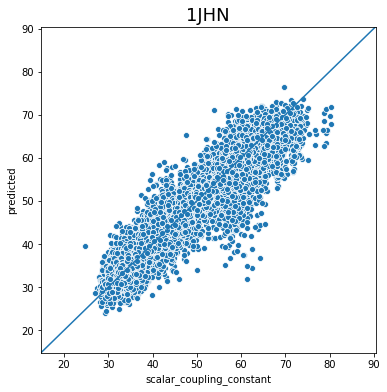

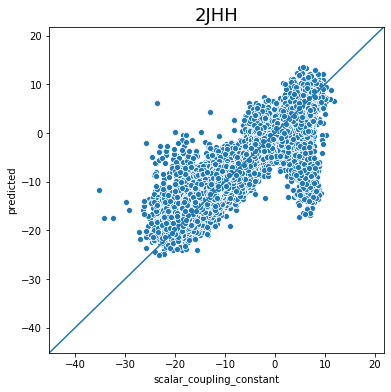

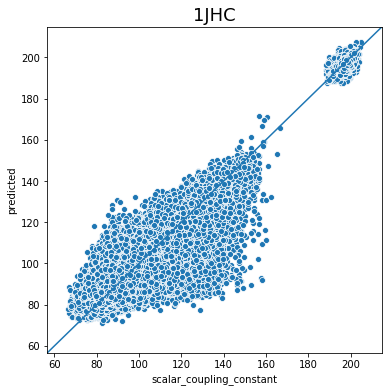

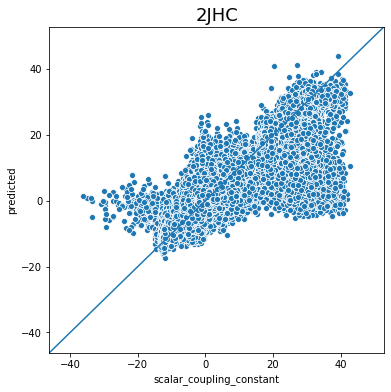

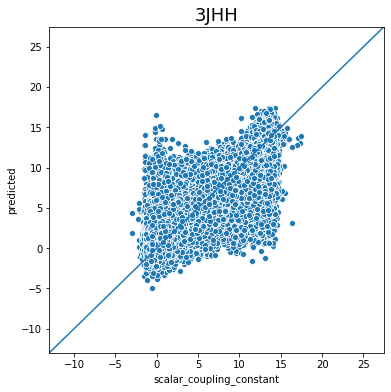

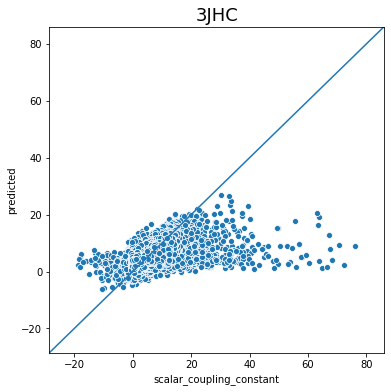

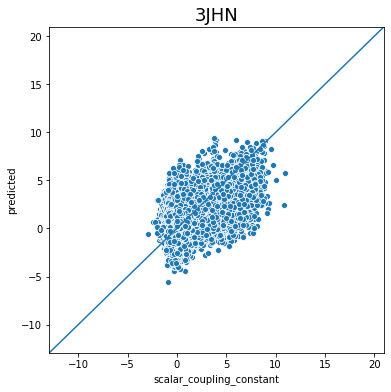

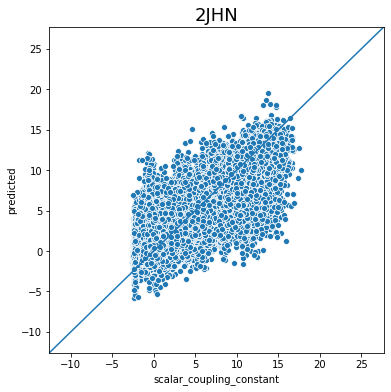

In [19]:
types = type_list.unique()
lims = [[min(train[train['type'] == i]['scalar_coupling_constant']) - 10,
         max(train[train['type'] == i]['scalar_coupling_constant']) + 10] for i in types]

plot_oof_preds(types, lims, y_train, result_dict_lgb, type_list)